# **Data Preprocessing**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS

/Users/rithvik17/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
# Make sure to download the necessary nltk resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /Users/rithvik17/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rithvik17/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Load the tweet tokens data
tweet_documents_raw = pd.read_csv("uk_ru_2023_en_text_random.csv")

In [ ]:
tweet_documents_raw.info()

In [ ]:
tweet_documents_raw.head()

In [ ]:
# Drop rows if < 15 words
tweet_documents_raw = tweet_documents_raw[tweet_documents_raw['text'].str.len() >= 15]

In [ ]:
tweet_documents_raw.info()

In [ ]:
def tokenize_text(document):
    # Convert text to lowercase
    text = document.lower()
     # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    return [lemmatizer.lemmatize(token) for token in tokens if token not in STOPWORDS and len(token) > 1]

def preprocess_text(tokens):
    return ' '.join(tokens)


In [ ]:
# Apply tokenization to create the token column
tweet_documents_raw['token'] = tweet_documents_raw['text'].apply(lambda x: tokenize_text(x) if isinstance(x, str) else [])

In [ ]:
# Use the 'token' column to create the 'processed_text' column
tweet_documents_raw['processed_text'] = tweet_documents_raw['token'].apply(preprocess_text)

In [ ]:
# Display the first few rows of the DataFrame
tweet_documents_raw.head()

In [ ]:
# Export the DataFrame to a CSV file
tweet_documents_raw.to_csv("uk_ru_2023_en_text_random_cleaned_stopwords.csv", index=False)

In [ ]:
# Example tokenized documents
tweet_tokens = tweet_documents_raw['token'].tolist()

In [ ]:
print(tweet_tokens[:2])

# **Latent Dirichlet Allocation (LDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

from gensim.models.ldamulticore import LdaMulticore

import re
import nltk
import ast
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

/Users/rithvik17/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package punkt to /Users/rithvik17/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rithvik17/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

In [ ]:
# Load the tweet tokens data
tweets_df = pd.read_csv("uk_ru_2023_en_text_random_cleaned_stopwords.csv")

In [ ]:
tweets_df.head()

,Unnamed: 0,userid,tweetid,text,hashtags,token,processed_text
0,0,54673723,1627620909380153344,repdavid i support 100,"SlavaUkraïni,JoeBiden","['repdavid', 'support']",repdavid support
1,1,2282983818,1611399917976850433,province editorial inequality hounds s populat...,"Canada,disabled,Vancouver,homeless","['province', 'editorial', 'inequality', 'hound...",province editorial inequality hound population...
2,2,283032385,1636646594098630656,they went to war when russia invaded ukraine t...,ArmUkraineNow,"['went', 'war', 'russia', 'invaded', 'ukraine'...",went war russia invaded ukraine believed freed...
3,3,1257755184463327232,1626920816691617792,on mintwave radio mint2dry,"nowplaying,alexa,streema,Scotland,echo,global,...","['mintwave', 'radio', 'mintdry']",mintwave radio mintdry
4,4,924117187,1640023379964055553,military historian douglas macgregor why will ...,"NATO,Russia,Kiev","['military', 'historian', 'douglas', 'macgrego...",military historian douglas macgregor crumble d...


In [ ]:
# Extracting the text for topic modeling
tweet_tokens = tweets_df['token']

In [ ]:
print(tweet_tokens[:5])

0                              ['repdavid', 'support']
1    ['province', 'editorial', 'inequality', 'hound...
2    ['went', 'war', 'russia', 'invaded', 'ukraine'...
3                     ['mintwave', 'radio', 'mintdry']
4    ['military', 'historian', 'douglas', 'macgrego...
Name: token, dtype: object


## **Create dictionary and corpus**

In [ ]:
print(tweet_tokens)

0                                   ['repdavid', 'support']
1         ['province', 'editorial', 'inequality', 'hound...
2         ['went', 'war', 'russia', 'invaded', 'ukraine'...
3                          ['mintwave', 'radio', 'mintdry']
4         ['military', 'historian', 'douglas', 'macgrego...
                                ...                        
494535    ['result', 'night', 'attack', 'kyiv', 'region'...
494536    ['computools', 'recognized', 'mobile', 'app', ...
494537    ['good', 'morning', 'remember', 'wave', 'new',...
494538    ['colonial', 'trope', 'force', 'german', 'apol...
494539    ['republican', 'governor', 'larry', 'hogan', '...
Name: token, Length: 494540, dtype: object


In [ ]:
preprocessed_documents = [ast.literal_eval(doc) if isinstance(doc, str) else doc for doc in tweet_tokens]

In [ ]:
preprocessed_documents

[['repdavid', 'support'],
 ['province',
  'editorial',
  'inequality',
  'hound',
  'population',
  'reminds',
  'daveeby',
  'kensimcitys',
  'dec',
  'announcement',
  'workcampstyle',
  'modular',
  'unit',
  'shelter',
  'handicap',
  'accessible',
  'workcamp',
  'modulars',
  'usually',
  'arent'],
 ['went',
  'war',
  'russia',
  'invaded',
  'ukraine',
  'believed',
  'freedom',
  'right',
  'live',
  'godgiven',
  'land',
  'laid',
  'life',
  'ukraine',
  'europe',
  'rip',
  'mykhailo',
  'lompas',
  'mykola',
  'los',
  'liubomyr',
  'lutsak',
  'roman',
  'lutsyk'],
 ['mintwave', 'radio', 'mintdry'],
 ['military',
  'historian',
  'douglas',
  'macgregor',
  'crumble',
  'destroys',
  'regime'],
 ['sask', 'washing', 'hand', 'pallet', 'expired', 'hand', 'sanitizer'],
 ['bggestman',
  'protossstan',
  'marcova',
  'beatkoine',
  'dimkq',
  'russian',
  'intelligence',
  'officer',
  'directed',
  'russian',
  'white',
  'supremacist',
  'group',
  'carry',
  'letterbombing',

In [ ]:
bigram = Phrases(preprocessed_documents, min_count=5, threshold=10)
trigram = Phrases(bigram[preprocessed_documents], min_count=5, threshold=10)

In [ ]:
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

In [ ]:
tweet_tokens_bigrams = [bigram_phraser[tweet] for tweet in preprocessed_documents]
tweet_tokens_trigrams = [trigram_phraser[bigram_phraser[tweet]] for tweet in preprocessed_documents]

In [ ]:
tweet_tokens_bigrams[:30]

[['repdavid', 'support'],
 ['province',
  'editorial',
  'inequality',
  'hound',
  'population',
  'reminds',
  'daveeby',
  'kensimcitys',
  'dec',
  'announcement',
  'workcampstyle',
  'modular',
  'unit',
  'shelter',
  'handicap',
  'accessible',
  'workcamp',
  'modulars',
  'usually',
  'arent'],
 ['went',
  'war',
  'russia',
  'invaded',
  'ukraine',
  'believed_freedom',
  'right',
  'live_godgiven',
  'land_laid',
  'life',
  'ukraine',
  'europe_rip',
  'mykhailo_lompas',
  'mykola_los',
  'liubomyr_lutsak',
  'roman_lutsyk'],
 ['mintwave_radio', 'mintdry'],
 ['military_historian', 'douglas_macgregor', 'crumble_destroys', 'regime'],
 ['sask', 'washing_hand', 'pallet', 'expired', 'hand', 'sanitizer'],
 ['bggestman',
  'protossstan',
  'marcova',
  'beatkoine',
  'dimkq',
  'russian',
  'intelligence_officer',
  'directed',
  'russian',
  'white_supremacist',
  'group',
  'carry',
  'letterbombing',
  'campaign',
  'spain',
  'late',
  'year',
  'targeting',
  'pm',
  'defeb

In [ ]:
dictionary_unigram = Dictionary(preprocessed_documents)
dictionary_bigrams = Dictionary(tweet_tokens_bigrams)
dictionary_trigrams = Dictionary(tweet_tokens_trigrams)

In [ ]:
dictionary_unigram.filter_extremes(no_below=20, no_above=0.75, keep_n=100000)
dictionary_bigrams.filter_extremes(no_below=10, no_above=0.5, keep_n=80000)
dictionary_trigrams.filter_extremes(no_below=5, no_above=0.6, keep_n=50000)

In [ ]:
corpus_unigrams = [dictionary_unigram.doc2bow(text) for text in preprocessed_documents]
corpus_bigrams = [dictionary_bigrams.doc2bow(text) for text in tweet_tokens_bigrams]
corpus_trigrams = [dictionary_trigrams.doc2bow(text) for text in tweet_tokens_trigrams]

In [ ]:
optimized_lda_model = LdaModel(corpus=corpus_trigrams,
            id2word=dictionary_trigrams,
            num_topics=5,
            random_state=20,
            chunksize=200,
            passes=2,
            alpha='auto',
            per_word_topics=True,
            eta='auto')

In [ ]:
coherence_model_lda = CoherenceModel(model=optimized_lda_model, texts=preprocessed_documents, dictionary=dictionary_unigram, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.37305246447561186


In [ ]:
coherence_model_lda = CoherenceModel(model=optimized_lda_model, texts=tweet_tokens_bigrams, dictionary=dictionary_bigrams, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4083223950871834


In [ ]:
coherence_model_lda = CoherenceModel(model=optimized_lda_model, texts=tweet_tokens_trigrams, dictionary=dictionary_trigrams, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39435220565503126


## **Determine k value**

In [ ]:
# unigrams - coherence

coherence_values = []
perplexity_values = []

k_values = range(3, 7)

for k in k_values:
    # Apply LDA
    lda_model = LdaMulticore(corpus=corpus_unigrams,
                             id2word=dictionary_unigram,
                             num_topics=k,
                             random_state=100,
                             chunksize=200,
                             passes=10,
                             per_word_topics=True,
                             workers=4)

    # Compute Coherence Score
    cm = CoherenceModel(model=lda_model, texts=preprocessed_documents, dictionary=dictionary_unigram, coherence='c_v')
    coherence_values.append(cm.get_coherence())

    # Compute Perplexity
    perplexity = lda_model.log_perplexity(corpus_unigrams)
    perplexity_values.append(perplexity)

# Plotting coherence and perplexity scores
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(k_values, coherence_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Perplexity', color=color)
ax2.plot(k_values, perplexity_values, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('LDA Model Performance: Coherence and Perplexity')
fig.tight_layout()
plt.show()

# Identifying the optimal number of topics
optimal_k = k_values[coherence_values.index(max(coherence_values))]
print("Optimal Number of Topics (k):", optimal_k)
print("Coherence Values:", coherence_values)
print("Perplexity Values:", perplexity_values)

In [ ]:
# bigrams - coherence

coherence_values = []
perplexity_values = []

k_values = range(3, 7)

for k in k_values:
    # Apply LDA
    lda_model = LdaMulticore(corpus=corpus_bigrams,
                             id2word=dictionary_bigrams,
                             num_topics=k,
                             random_state=100,
                             chunksize=200,
                             passes=10,
                             per_word_topics=True,
                             workers=4)

    # Compute Coherence Score
    cm = CoherenceModel(model=lda_model, texts=tweet_tokens_bigrams, dictionary=dictionary_bigrams, coherence='c_v')
    coherence_values.append(cm.get_coherence())

    # Compute Perplexity
    perplexity = lda_model.log_perplexity(corpus_bigrams)
    perplexity_values.append(perplexity)

# Plotting coherence and perplexity scores
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(k_values, coherence_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Perplexity', color=color)
ax2.plot(k_values, perplexity_values, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('LDA Model Performance: Coherence and Perplexity')
fig.tight_layout()
plt.show()

# Identifying the optimal number of topics
optimal_k = k_values[coherence_values.index(max(coherence_values))]
print("Optimal Number of Topics (k):", optimal_k)
print("Coherence Values:", coherence_values)
print("Perplexity Values:", perplexity_values)

In [ ]:
# trigrams - coherence

coherence_values = []
perplexity_values = []

k_values = range(3, 7)

for k in k_values:
    # Apply LDA
    lda_model = LdaMulticore(corpus=corpus_trigrams,
                             id2word=dictionary_trigrams,
                             num_topics=k,
                             random_state=100,
                             chunksize=200,
                             passes=10,
                             per_word_topics=True,
                             workers=4)

    # Compute Coherence Score
    cm = CoherenceModel(model=lda_model, texts=tweet_tokens_trigrams, dictionary=dictionary_trigrams, coherence='c_v')
    coherence_values.append(cm.get_coherence())

    # Compute Perplexity
    perplexity = lda_model.log_perplexity(corpus_trigrams)
    perplexity_values.append(perplexity)

# Plotting coherence and perplexity scores
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(k_values, coherence_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Perplexity', color=color)
ax2.plot(k_values, perplexity_values, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('LDA Model Performance: Coherence and Perplexity')
fig.tight_layout()
plt.show()

# Identifying the optimal number of topics
optimal_k = k_values[coherence_values.index(max(coherence_values))]
print("Optimal Number of Topics (k):", optimal_k)
print("Coherence Values:", coherence_values)
print("Perplexity Values:", perplexity_values)

Given the above plot, the optimal number of topics chosen will be 5 using bigrams

## **Apply LDA Model**

In [ ]:
optimized_lda_model = LdaModel(corpus=corpus_trigrams,
            id2word=dictionary_trigrams,
            num_topics=5,
            random_state=100,
            chunksize=200,
            passes=2,
            alpha='auto',
            per_word_topics=True,
            eta='auto')


In [ ]:
import pickle

# Assuming lda_model is your trained LDA model
with open('final_lda_model.pkl', 'wb') as f:
    pickle.dump(optimized_lda_model, f)


## **Analyze the Output Topics**

In [ ]:
# Print the Keyword in the 10 topics
for idx, topic in optimized_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

**updated**

**Topic 0: Military Actions and Operations**

Keywords: russian, ukrainian, putin, soldier, bakhmut, force, tank, city, destroyed, attack

Interpretation: This topic appears to focus on direct military actions and operations, mentioning specific roles (soldier, force), equipment (tank), locations (city, Bakhmut), and outcomes (destroyed, attack). It likely captures tweets discussing the specifics of military engagements between Russian and Ukrainian forces.


**Topic 1: Civilian Support and Information Sharing**

Keywords: time, video, help, know, work, thank, stand, thing, destroy, moscow

Interpretation: This topic seems to involve civilian aspects of the conflict, including the dissemination of information (video), expressions of gratitude (thank), and calls for support (help, stand). The reference to Moscow might indicate discussions on the broader geopolitical or domestic Russian context.


**Topic 2: Broad Overview of the Conflict**

Keywords: ukraine, russia, war, day, today, president, drone, say, china, invasion

Interpretation: Offering a broad overview of the conflict, this topic covers the primary belligerents (Ukraine, Russia), the nature of the conflict (war, invasion), high-level discussions or statements (president, say), and involvement or mentions of other countries (china). It could represent tweets providing general updates or news on the war.


**Topic 3: Strategic Military Aspects**

Keywords: military, said, troop, nato, stop, life, fight, way, area, good

Interpretation: Focusing on strategic military aspects, this topic touches on military forces (military, troop), alliances (nato), and broader strategic or ethical considerations (stop, fight, life). It may cover discussions on military strategies, alliances' roles, and the human aspects of military actions.


**Topic 4: International Support and Public Opinion**

Keywords: people, country, support, world, new, year, need, like, right, want

Interpretation: This topic centers on international perspectives, support dynamics, and public opinion related to the conflict (support, world, people, country). Keywords suggest discussions on global reactions, the need for support, and reflections on rights and desires in the context of the conflict.


In [ ]:
# # Create the corpus from the trigrams
# corpus_trigrams = [dictionary_trigrams.doc2bow(text) for text in tweet_tokens_trigrams]

# # Get the most dominant topic and its weight for each document
# doc_topics_with_weights = [max(optimized_lda_model.get_document_topics(bow), key=lambda x: x[1]) for bow in corpus_trigrams]

# topic_labels = {
#     0: "Military Actions and Operations",
#     1: "Civilian Support and Information Sharing",
#     2: "Broad Overview of the Conflict",
#     3: "Strategic Military Aspects",
#     4: "International Support and Public Opinion"
# }

# tweet_documents_raw['Topic Label'] = [topic_labels[topic] for topic, weight in doc_topics_with_weights]
# tweet_documents_raw['Topic Weight'] = [weight for topic, weight in doc_topics_with_weights]


# output_file_path = 'uk_ru_2023_en_text_random_labeled_dataset.csv'  # Specify your desired output file path
# tweet_documents_raw.to_csv(output_file_path, index=False)



## **Topic Dist across documents**

In [ ]:
dominant_topics = []
for tweet_id, bow in enumerate(corpus_trigrams):
    dominant_topic = sorted(optimized_lda_model[bow], key=lambda x: -x[1])[0]
    dominant_topics.append((tweet_id, dominant_topic[0], dominant_topic[1]))


In [ ]:
first_5_dominant_topics = dominant_topics[:5]

topic_labels = {
    0: "Military Actions and Operations",
    1: "Civilian Support and Information Sharing",
    2: "Broad Overview of the Conflict",
    3: "Strategic Military Aspects",
    4: "International Support and Public Opinion"
}

for doc_id, topic_id, topic_weight in first_5_dominant_topics:
    print(f"Document ID: {doc_id}")
    print(f"Dominant Topic ID: {topic_id}, Weight: {topic_weight:.4f}")
    print(f"Dominant Topic Label: {topic_labels[topic_id]}")
    print("------")

## **Word Cloud**

In [ ]:
!pip install --upgrade Pillow

In [ ]:
!pip install --upgrade wordcloud matplotlib

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for each topic
for t in range(optimized_lda_model.num_topics):
    plt.figure()

    # Extract the most significant words for the topic
    topic_terms = optimized_lda_model.show_topic(t, topn=50)

    # Prepare data for the word cloud: Convert the list of (word, weight) tuples to a frequency dictionary
    wc_data = {word: weight for word, weight in topic_terms}

    # Create and generate a word cloud image
    wc = WordCloud(background_color='white', width=800, height=600, max_words=50).generate_from_frequencies(wc_data)

    # Display the generated word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic #{t + 1}')
    plt.show()


## **Calculate the coherence score**
 measures how well the topics are defined with a higher coherence score means the topics are more interpretable and meaningful.

In [ ]:
tweet_tokens

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimized_lda_model, texts=tweet_tokens_trigrams, dictionary=dictionary_trigrams, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


In [ ]:
corpus_trigrams

## **Calculate perplexity**
measures how well the model predicts a sample and is often used as a measure of the model's complexity, with lower values indicating better performance

In [ ]:
print('Perplexity: ', optimized_lda_model.log_perplexity(corpus_trigrams))


## **Evaluation and Visualisation**

In [ ]:
# Aggregate Topic Presence Across the Corpus

topic_weights = []

for i, row_list in enumerate(optimized_lda_model[corpus_trigrams]):
    topic_weights.append([w for i, w in row_list])

# Convert the topic weights to a dataframe
df_topic_weights = pd.DataFrame(topic_weights).fillna(0)  # Fill NaN with 0s for docs without all topics


In [ ]:
# Calculate the Percentage of Each Topic

# Sum the contribution of each topic and normalize it to get the percentage
topic_contribution = df_topic_weights.sum().to_frame(name='contribution')
topic_contribution['percentage'] = (topic_contribution['contribution'] / topic_contribution['contribution'].sum()) * 100

# Sort the topics by percentage
topic_contribution = topic_contribution.sort_values(by="percentage", ascending=False)


In [ ]:
# Visualize the Topic Distribution

plt.figure(figsize=(10,6))
plt.bar(topic_contribution.index, topic_contribution['percentage'], color='lightblue')
plt.xlabel('Topics')
plt.ylabel('Percentage (%)')
plt.title('Topic Distribution Across Corpus')
plt.xticks(topic_contribution.index, ['Topic {}'.format(i) for i in topic_contribution.index])
plt.show()



## **pyLDAvis**

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install -U pyldavis

In [ ]:
!pip install numpy --upgrade

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimized_lda_model, corpus_trigrams, dictionary=dictionary_trigrams)

# Visualize
pyLDAvis.display(vis)


In [ ]:
pyLDAvis.save_html(vis, "topic_viz.html")

## **Demo - new tweets**

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.corpora import Dictionary


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))

def tokenize_text(document):
    # Convert text to lowercase
    text = document.lower()
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    return [lemmatizer.lemmatize(token) for token in tokens if token not in STOPWORDS and len(token) > 1]


In [ ]:
new_tweets = ["Intense fighting reported in eastern Ukraine as Russian forces launch a new offensive near Donetsk. Ukrainian troops hold their positions despite heavy artillery fire. #UkraineWar #Donetsk",
              "Local volunteers in Kyiv organize a fundraiser to support displaced families affected by the conflict. Donation centers open citywide for food and clothing. #SupportUkraine #KyivHelps",
              "Two years into the Russia-Ukraine war, thousands have been displaced, and cities lie in ruins. A look back at how the conflict has reshaped Eastern Europe. #UkraineConflict #WarImpact",
              "Experts analyze the strategic significance of Crimea in the ongoing Russia-Ukraine conflict, highlighting the peninsula's military and naval importance. #CrimeaStrategy #MilitaryAnalysis",
              "Global rallies show support for Ukraine amidst ongoing conflict. From Paris to Tokyo, thousands gather in solidarity against aggression. #StandWithUkraine #GlobalSupport"]

preprocessed_new_tweets = [tokenize_text(tweet) for tweet in new_tweets]


In [ ]:
dictionary = Dictionary(preprocessed_documents)
dictionary.filter_extremes(no_below=5, no_above=0.5)

new_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_new_tweets]

In [ ]:
for i, doc_bow in enumerate(new_corpus):
    print(f"Tweet #{i+1} Topic Distribution:")
    doc_topics = optimized_lda_model.get_document_topics(doc_bow)
    for topic_id, topic_prob in doc_topics:
        print(f"Topic ID: {topic_id}, Probability: {topic_prob}")
    print("\n")


# **Latent Semantic Analysis (LSA)**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error


from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import Sparse2Corpus

import ast
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix

In [ ]:
# Load the tweet tokens data
tweets_df = pd.read_csv("uk_ru_2023_en_text_random_cleaned_stopwords.csv")

In [ ]:
tweets_df.head()

,Unnamed: 0,userid,tweetid,text,hashtags,token,processed_text
0,0,54673723,1627620909380153344,repdavid i support 100,"SlavaUkraïni,JoeBiden","['repdavid', 'support']",repdavid support
1,1,2282983818,1611399917976850433,province editorial inequality hounds s populat...,"Canada,disabled,Vancouver,homeless","['province', 'editorial', 'inequality', 'hound...",province editorial inequality hound population...
2,2,283032385,1636646594098630656,they went to war when russia invaded ukraine t...,ArmUkraineNow,"['went', 'war', 'russia', 'invaded', 'ukraine'...",went war russia invaded ukraine believed freed...
3,3,1257755184463327232,1626920816691617792,on mintwave radio mint2dry,"nowplaying,alexa,streema,Scotland,echo,global,...","['mintwave', 'radio', 'mintdry']",mintwave radio mintdry
4,4,924117187,1640023379964055553,military historian douglas macgregor why will ...,"NATO,Russia,Kiev","['military', 'historian', 'douglas', 'macgrego...",military historian douglas macgregor crumble d...


In [ ]:
# Extracting the text for topic modeling
tweet_tokens = tweets_df['token']

In [ ]:
print(tweet_tokens[:5])

0                              ['repdavid', 'support']
1    ['province', 'editorial', 'inequality', 'hound...
2    ['went', 'war', 'russia', 'invaded', 'ukraine'...
3                     ['mintwave', 'radio', 'mintdry']
4    ['military', 'historian', 'douglas', 'macgrego...
Name: token, dtype: object


## **Create a TF-IDF Matrix**

In [ ]:
# Creating a TfidfVectorizer for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=100000,
                                   min_df=2, stop_words='english',
                                   use_idf=True)

# Fitting the vectorizer to the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(tweet_tokens)


## **Coherence Score**

Evaluating an LSA model using coherence score and perplexity is a bit nuanced compared to models like LDA, primarily because LSA (implemented via TruncatedSVD in scikit-learn) doesn't directly offer a perplexity measure as it's not a probabilistic model. However, we can compute a coherence score by leveraging external libraries like Gensim, albeit with some additional steps.

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary



**Step 1: Extract Top Words from Each Topic of LSA Model**


In [ ]:
# Assuming `lsa` is your TruncatedSVD model from scikit-learn
# And `tfidf_vectorizer` is the TfidfVectorizer instance used to transform your original text data
feature_names = tfidf_vectorizer.get_feature_names_out()
n_top_words = 10
svd = TruncatedSVD(n_components=5)
lsa = make_pipeline(svd, Normalizer(copy=False))
lsa_model = lsa.fit_transform(tfidf_matrix)

top_words_per_topic = []
for topic_idx, topic in enumerate(svd.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    top_words_per_topic.append(top_features)


In [ ]:
print(top_words_per_topic)

[['russian', 'ukraine', 'ukrainian', 'bakhmut', 'war', 'soldier', 'russia', 'force', 'attack', 'footage'], ['ukraine', 'war', 'russia', 'putin', 'people', 'crime', 'year', 'support', 'world', 'president'], ['ukraine', 'bakhmut', 'footage', 'intelligence', 'defence', 'update', 'latest', 'drone', 'horrible', 'situation'], ['defence', 'intelligence', 'force', 'update', 'situation', 'latest', 'armed', 'ukraine', 'use', 'language'], ['intelligence', 'defence', 'war', 'ukrainian', 'update', 'situation', 'latest', 'crime', 'bakhmut', 'language']]


**Step 2: Prepare Documents in Gensim-Format and Build Dictionary**


In [ ]:
print(tweet_tokens)

0                                   ['repdavid', 'support']
1         ['province', 'editorial', 'inequality', 'hound...
2         ['went', 'war', 'russia', 'invaded', 'ukraine'...
3                          ['mintwave', 'radio', 'mintdry']
4         ['military', 'historian', 'douglas', 'macgrego...
                                ...                        
494535    ['result', 'night', 'attack', 'kyiv', 'region'...
494536    ['computools', 'recognized', 'mobile', 'app', ...
494537    ['good', 'morning', 'remember', 'wave', 'new',...
494538    ['colonial', 'trope', 'force', 'german', 'apol...
494539    ['republican', 'governor', 'larry', 'hogan', '...
Name: token, Length: 494540, dtype: object


In [ ]:
preprocessed_documents = [ast.literal_eval(doc) if isinstance(doc, str) else doc for doc in tweet_tokens]

In [ ]:
bigram = Phrases(preprocessed_documents, min_count=1, threshold=2)
trigram = Phrases(bigram[preprocessed_documents], min_count=1, threshold=2)

In [ ]:
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

In [ ]:
tweet_tokens_bigrams = [bigram_phraser[tweet] for tweet in preprocessed_documents]
tweet_tokens_trigrams = [trigram_phraser[bigram_phraser[tweet]] for tweet in preprocessed_documents]

In [ ]:
dictionary_unigram = Dictionary(preprocessed_documents)
dictionary_bigrams = Dictionary(tweet_tokens_bigrams)
dictionary_trigrams = Dictionary(tweet_tokens_trigrams)

In [ ]:
dictionary_unigram.filter_extremes(no_below=20, no_above=0.75, keep_n=100000)
dictionary_bigrams.filter_extremes(no_below=10, no_above=0.5, keep_n=80000)
dictionary_trigrams.filter_extremes(no_below=5, no_above=0.6, keep_n=50000)

**Step 3: Convert Documents to Gensim Corpus**


In [ ]:
corpus_trigrams = [dictionary_trigrams.doc2bow(text) for text in tweet_tokens_trigrams]

**Step 4: Compute Coherence Score**


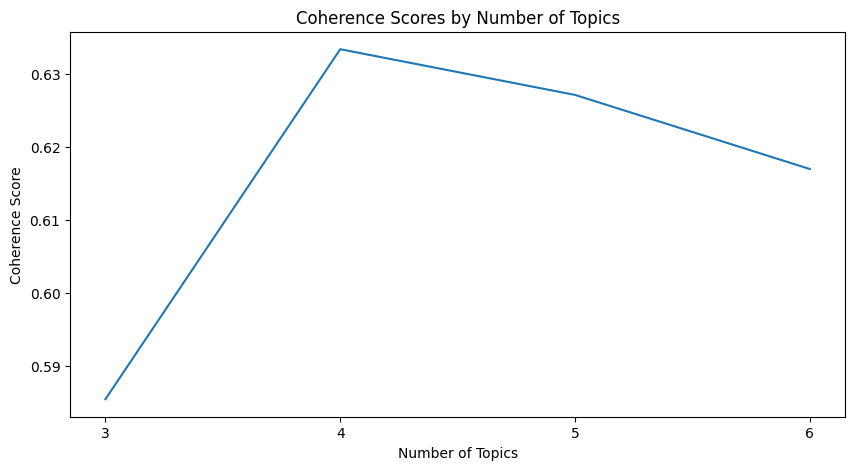

Optimal Number of Topics (k): 4
Coherence Values: [0.585513086889009, 0.6333311092309153, 0.6270881196881751, 0.6169599361600371]


In [ ]:
# unigrams - coherence
coherence_values = []

k_values = range(3, 7)

for k in k_values:
    # Apply LSA/SVD
    svd_model = TruncatedSVD(n_components=k)
    dtm_lsa = svd_model.fit_transform(tfidf_matrix)

    # Convert the LSA topic distribution into the gensim format to compute coherence
    lsa_topics = []
    for i, component in enumerate(svd_model.components_):
      top_indices = np.argsort(component)[::-1]
      # Get the top words using the sorted indices and append to lsa_topics
      top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices[:10]]
      lsa_topics.append(top_terms)

    # Using Gensim's coherence model to evaluate
    cm = CoherenceModel(topics=lsa_topics, texts=preprocessed_documents, dictionary=dictionary_unigram, coherence='c_v')
    coherence_values.append(cm.get_coherence())

# Plotting coherence scores against k
plt.figure(figsize=(10, 5))
plt.plot(k_values, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.xticks(k_values)
plt.show()


# Identify the k with the highest coherence score
optimal_k = k_values[np.argmax(coherence_values)]
print("Optimal Number of Topics (k):", optimal_k)
print("Coherence Values:", coherence_values)


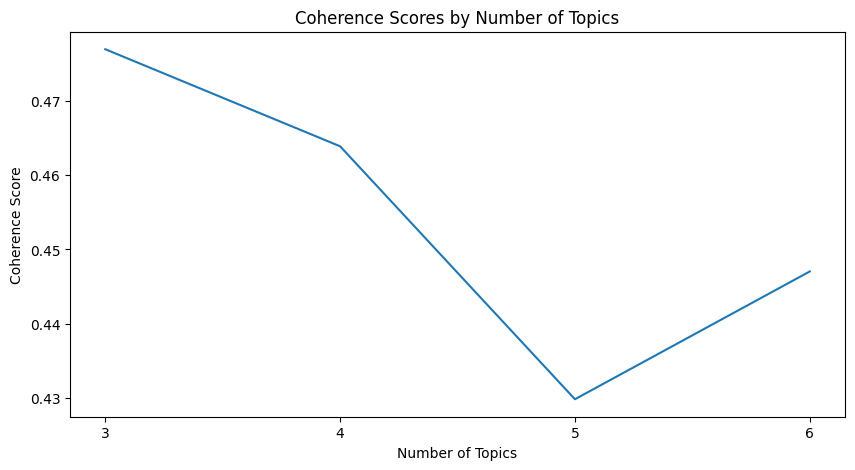

Optimal Number of Topics (k): 3
Coherence Values: [0.47694425639375576, 0.4638808971911615, 0.42984207475715125, 0.44703838608525176]


In [ ]:
# bigrams - coherence
coherence_values = []

k_values = range(3, 7)

for k in k_values:
    # Apply LSA/SVD
    svd_model = TruncatedSVD(n_components=k)
    dtm_lsa = svd_model.fit_transform(tfidf_matrix)

    # Convert the LSA topic distribution into the gensim format to compute coherence
    lsa_topics = []
    for i, component in enumerate(svd_model.components_):
      top_indices = np.argsort(component)[::-1]
      # Get the top words using the sorted indices and append to lsa_topics
      top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices[:10]]
      lsa_topics.append(top_terms)

    # Using Gensim's coherence model to evaluate
    cm = CoherenceModel(topics=lsa_topics, texts=tweet_tokens_bigrams, dictionary=dictionary_bigrams, coherence='c_v')
    coherence_values.append(cm.get_coherence())

# Plotting coherence scores against k
plt.figure(figsize=(10, 5))
plt.plot(k_values, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.xticks(k_values)
plt.show()


# Identify the k with the highest coherence score
optimal_k = k_values[np.argmax(coherence_values)]
print("Optimal Number of Topics (k):", optimal_k)
print("Coherence Values:", coherence_values)


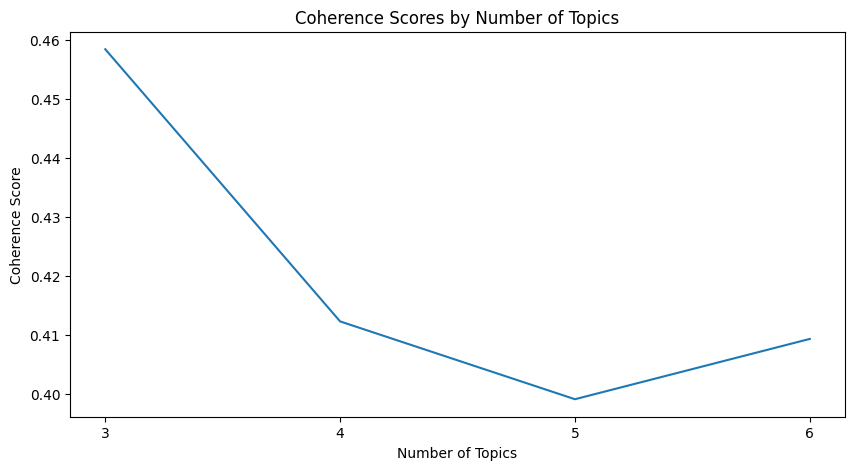

Optimal Number of Topics (k): 3
Coherence Values: [0.45842751242715746, 0.41223714829126246, 0.399031998850921, 0.40926607403142395]


In [ ]:
# trigrams - coherence
coherence_values = []

k_values = range(3, 7)

for k in k_values:
    # Apply LSA/SVD
    svd_model = TruncatedSVD(n_components=k)
    dtm_lsa = svd_model.fit_transform(tfidf_matrix)

    # Convert the LSA topic distribution into the gensim format to compute coherence
    lsa_topics = []
    for i, component in enumerate(svd_model.components_):
      top_indices = np.argsort(component)[::-1]
      # Get the top words using the sorted indices and append to lsa_topics
      top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices[:10]]
      lsa_topics.append(top_terms)

    # Using Gensim's coherence model to evaluate
    cm = CoherenceModel(topics=lsa_topics, texts=tweet_tokens_trigrams, dictionary=dictionary_trigrams, coherence='c_v')
    coherence_values.append(cm.get_coherence())

# Plotting coherence scores against k
plt.figure(figsize=(10, 5))
plt.plot(k_values, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.xticks(k_values)
plt.show()


# Identify the k with the highest coherence score
optimal_k = k_values[np.argmax(coherence_values)]
print("Optimal Number of Topics (k):", optimal_k)
print("Coherence Values:", coherence_values)


In [ ]:
k = 5
svd_model = TruncatedSVD(n_components=k)
dtm_lsa = svd_model.fit_transform(tfidf_matrix)

# Convert the LSA topic distribution into the gensim format to compute coherence
lsa_topics = []
for i, component in enumerate(svd_model.components_):
  top_indices = np.argsort(component)[::-1]
  # Get the top words using the sorted indices and append to lsa_topics
  top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_indices[:10]]
  lsa_topics.append(top_terms)

In [ ]:
# unigram
cm = CoherenceModel(topics=lsa_topics, texts=preprocessed_documents, dictionary=dictionary_unigram, coherence='c_v')
coherence_lda = cm.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.602364553754134


In [ ]:
# bigram
cm = CoherenceModel(topics=lsa_topics, texts=tweet_tokens_bigrams, dictionary=dictionary_bigrams, coherence='c_v')
coherence_lda = cm.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4315676166918759


In [ ]:
# trigram
cm = CoherenceModel(topics=lsa_topics, texts=tweet_tokens_trigrams, dictionary=dictionary_trigrams, coherence='c_v')
coherence_lda = cm.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40470066695350504


In [ ]:
top_words_per_topic = [
    ["russian", "ukraine", "war", "soldier", "attack"],  # Topic 0
    ["ukraine", "putin", "russia", "support", "world"],  # Topic 1
    ["intelligence", "defence", "drone", "footage", "bakhmut"],  # Topic 2
    ["crime", "war", "footage", "troop", "video"],  # Topic 3
    ["wagner", "armed", "group", "battle", "force"]  # Topic 4
]

## **Perplexity**

Perplexity is not applicable for LSA models since it is not a probabilistic model. If you are interested in evaluating the fit or the quality of the LSA model beyond coherence, consider alternative measures like the explained variance ratio from the SVD or reconstruction errors.

## **Reconstruction Error**

In [ ]:
# bigrams - reconstruction err - (when k = 4)

k = 4  # Set number of topics/components

# Apply LSA/SVD with k = 4
svd_model = TruncatedSVD(n_components=k)
dtm_lsa = svd_model.fit_transform(tfidf_matrix)

# Reconstruct the matrix using the fitted model
reconstructed_matrix = svd_model.inverse_transform(dtm_lsa)

# Computing reconstruction error
# Since direct computation for the whole matrix might be memory-intensive,
# we consider a more memory-efficient approach:

# Define a function to calculate MSE in batches for sparse matrices
def calculate_sparse_mse(sparse_matrix, reconstructed_matrix):
    mse_total = 0
    n_rows = sparse_matrix.shape[0]
    batch_size = 500  # Adjust based on your system's memory capacity

    for start_idx in range(0, n_rows, batch_size):
        end_idx = min(start_idx + batch_size, n_rows)
        # Slicing rows for sparse matrix
        original_batch = sparse_matrix[start_idx:end_idx].toarray()  # Convert batch to dense
        reconstructed_batch = reconstructed_matrix[start_idx:end_idx]  # Direct slice from dense reconstructed matrix

        mse_batch = mean_squared_error(original_batch, reconstructed_batch)
        mse_total += mse_batch * (end_idx - start_idx)  # Weighted sum of MSE

    return mse_total / n_rows  # Return the average MSE

# Calculate the reconstruction error
reconstruction_error = calculate_sparse_mse(tfidf_matrix, reconstructed_matrix)
print("Reconstruction Error (k=4):", reconstruction_error)


In [ ]:
# bigrams - reconstruction err
reconstruction_errors = []

k_values = range(2, 7)

for k in k_values:
    # Apply LSA/SVD
    svd_model = TruncatedSVD(n_components=k)
    dtm_lsa = svd_model.fit_transform(tfidf_matrix)

    # Calculate reconstruction error
    reconstructed_matrix = svd_model.inverse_transform(dtm_lsa)

    error = np.sqrt(mean_squared_error(tfidf_matrix.toarray(), reconstructed_matrix))
    reconstruction_errors.append(error)


# Plot reconstruction errors
plt.figure(figsize=(10, 5))
plt.plot(k_values, reconstruction_errors, label='Reconstruction Error', color='r')
plt.xlabel("Number of Topics")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Errors for Different Numbers of Topics")
plt.legend(loc='upper right')
plt.show()

# Identify the k with the highest coherence score
print("Reconstruction Error Values:", reconstruction_errors)

In [ ]:
# trigrams - reconstruction err
reconstruction_errors = []

k_values = range(2, 7)

for k in k_values:
    # Apply LSA/SVD
    svd_model = TruncatedSVD(n_components=k)
    dtm_lsa = svd_model.fit_transform(tfidf_matrix)

    # Calculate reconstruction error
    reconstructed_matrix = svd_model.inverse_transform(dtm_lsa)
    error = np.sqrt(mean_squared_error(tfidf_matrix.toarray(), reconstructed_matrix))
    reconstruction_errors.append(error)

# Plot reconstruction errors
plt.twinx()
plt.plot(k_values, reconstruction_errors, label='Reconstruction Error', color='r')
plt.ylabel("Reconstruction Error")

# Adding legend
plt.legend(loc='upper right')
plt.show()

# Identify the k with the highest coherence score
print("Reconstructuion Error Values:", reconstruction_errors)

## **LSA Using TruncatedSVD**

In [ ]:
num_topics = 4

svd = TruncatedSVD(n_components=num_topics, random_state=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Fit the model to the dataset
lsa_topic_matrix = lsa.fit_transform(tfidf_matrix)

## **Explore the topics**

In [ ]:
terms = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10]
    print("Topic " + str(i) + ": ")
    print(", ".join([t[0] for t in sorted_terms]))


### **2D Visualization of Documents in Topic Space**


In [ ]:
# Assuming the first two components are used for 2D plot
xs, ys = lsa_topic_matrix[:, 0], lsa_topic_matrix[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel('LSA Dimension 1')
plt.ylabel('LSA Dimension 2')
plt.title('Documents in LSA Topic Space')
plt.show()


# **Probablistic Latent Semantic Analysis (PLSA)**

In [ ]:
# !pip install PLSA

In [ ]:
import sys
import csv
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
# import main dataset
tweets_df = pd.read_csv("uk_ru_2023_en_text_random_cleaned_stopwords.csv")

In [ ]:
# getting the tokens column
column = tweets_df['token']
tweets_tokens = pd.DataFrame(column)
tweets_tokens

In [ ]:
# generating bigram and trigram tokens
preprocessed_documents = [ast.literal_eval(doc) if isinstance(doc, str) else doc for doc in column]
bigram = Phrases(preprocessed_documents, min_count=5, threshold=10)
trigram = Phrases(bigram[preprocessed_documents], min_count=5, threshold=10)
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)
tweet_tokens_bigrams = [bigram_phraser[tweet] for tweet in preprocessed_documents]
tweet_tokens_trigrams = [trigram_phraser[bigram_phraser[tweet]] for tweet in preprocessed_documents]

In [ ]:
# exporting bigram/trigram tokens since model only takes in csv file
csv_file_path = "trigram_tokens.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    for tokens in tweet_tokens_trigrams: # change based on what needs to be exported
        writer.writerow([str(tokens)])

print("Tokens have been written to", csv_file_path)

In [ ]:
# # export unigram tokens
# tweets_tokens.to_csv('tweets_tokens.csv')

In [ ]:
# change based on the type of tokens that need to be used (e.g. unigram or bigram or trigram)
csv_file = "trigram_tokens.csv"

In [ ]:
# prepare the corpus
pipeline = Pipeline(*DEFAULT_PIPELINE)
corpus = Corpus.from_csv(csv_file, pipeline)
corpus

In [ ]:
# instantiate plsa model
n_topics = 5
plsa_model = PLSA(corpus, n_topics, True)
plsa_model

In [ ]:
# fit plsa model
plsa_model.fit()

In [ ]:
# 10 iterations
result = plsa_model.best_of(10)

In [ ]:
# function to get coherence score
def coherence_score(result, num_topics, coherence_measure='pmi', top_n=10,):
    # Initialize list to store coherence scores for each topic
    coherence_scores = []

    # Iterate over each topic
    for topic in range(num_topics):
        # Get the top words for the topic
        top_words = result.word_given_topic[topic][:top_n]

        # Calculate coherence score for the topic
        coherence_score = calculate_topic_coherence(top_words, coherence_measure)

        # Append coherence score to list
        coherence_scores.append(coherence_score)

    # Compute average coherence score across all topics
    overall_coherence_score = np.mean(coherence_scores)

    return overall_coherence_score

In [ ]:
# prepare variables to calculate coherence score
top_words_per_topic = [[word for word, _ in topic] for topic in result.word_given_topic]
word_to_id = {word: idx for idx, word in enumerate(corpus.vocabulary)}
vocabulary = corpus.vocabulary
all_topics_output = []

# Iterate over each topic
for i in range(5):
    # Get the top words for the current topic
    top_words = [word for word, _ in result.word_given_topic[i][:10]]
    # Append the top words for the current topic to the list
    all_topics_output.append(top_words)

In [ ]:
# prepare variables to calculate coherence score
documents = [doc.strip("[]").replace("'", "").split(", ") for doc in corpus.raw]
tweets_tokens['token'] = tweets_tokens['token'].apply(ast.literal_eval)
list_tokens = tweets_tokens['token'].tolist()
dictionary = Dictionary(list_tokens)

In [ ]:
# calculating the coherence score
cm = CoherenceModel(topics=all_topics_output, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_score = cm.get_coherence()
print("Coherence Score:", coherence_score)

In [ ]:
visualize = Visualize(result)

In [ ]:
# to choose the ideal number of iterations
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

In [ ]:
# importance of topics
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

In [ ]:
new_doc = 'putin and nato are the reason for this war '

fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()

In [ ]:
# word cloud
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)